# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# # Create url for Open Weather Map with API key
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q="


In [9]:
# Create lists to for each variable to make Data Frame
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Counter
record = 0
set_count = 1

# Print statement
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Create 'for loop' using 'try', 'except', and 'continue' to append data into 
# appropriate list and to skip cities with no records
for i, city in enumerate(cities):
    record+=1
    if(i%50==0 and i>=50):
        set_count+=1
        record=0    
    try:
        response = requests.get(query_url + city.replace(" ","%20")).json()
        city_list.append(response["name"])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f"Processing Record {record} of Set {set_count} | {city}")
    except:
        print("City not found. Skipping...")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | lerwick
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | hilo
City not found. Skipping...
Processing Record 6 of Set 1 | lufilufi
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | riyadh
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | meiganga
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | suhbaatar
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | palm city
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | itacarambi
Processing Record 18 of Set 1 | torbay
City not found. Skipping...
Processing Record 20 of Set 1 | kiama
Processing Record 21 of Set 1 | kaitangata
Processing Record 22 of Set 1 | talnakh
Processing Record 23 of Set 1 | hithadhoo
Processing Record 24 of Set 1 | tuktoyaktuk
P

Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | rio grande
Processing Record 8 of Set 5 | jining
Processing Record 9 of Set 5 | arlit
Processing Record 10 of Set 5 | hirara
Processing Record 11 of Set 5 | ancud
Processing Record 12 of Set 5 | cape town
City not found. Skipping...
Processing Record 14 of Set 5 | weinan
Processing Record 15 of Set 5 | tessalit
Processing Record 16 of Set 5 | belmonte
Processing Record 17 of Set 5 | vanimo
Processing Record 18 of Set 5 | mogadishu
Processing Record 19 of Set 5 | diffa
Processing Record 20 of Set 5 | almeirim
City not found. Skipping...
Processing Record 22 of Set 5 | saskylakh
Processing Record 23 of Set 5 | esperance
Processing Record 24 of Set 5 | berlevag
Processing Record 25 of Set 5 | dusetos
Processing Record 26 of Set 5 | bloemfontein
City not found. Skipping...
Processing Record 28 of Set 5 | wuan
City not found. Skipping...
Processing Record 30 of Set 5 | kruisfontein
City not found. Skipping...
Processing Rec

Processing Record 16 of Set 9 | hovd
Processing Record 17 of Set 9 | rock sound
Processing Record 18 of Set 9 | carauari
Processing Record 19 of Set 9 | isabela
Processing Record 20 of Set 9 | bozoum
City not found. Skipping...
Processing Record 22 of Set 9 | kavaratti
Processing Record 23 of Set 9 | chimore
Processing Record 24 of Set 9 | neepawa
Processing Record 25 of Set 9 | cabo rojo
Processing Record 26 of Set 9 | grenada
Processing Record 27 of Set 9 | kupang
Processing Record 28 of Set 9 | lundazi
City not found. Skipping...
Processing Record 30 of Set 9 | mendoza
City not found. Skipping...
Processing Record 32 of Set 9 | ialibu
Processing Record 33 of Set 9 | cabo san lucas
Processing Record 34 of Set 9 | chokurdakh
Processing Record 35 of Set 9 | amapa
Processing Record 36 of Set 9 | khatassy
Processing Record 37 of Set 9 | zhoucheng
Processing Record 38 of Set 9 | pacific grove
Processing Record 39 of Set 9 | brigantine
Processing Record 40 of Set 9 | townsville
Processing 

Processing Record 22 of Set 13 | ojinaga
Processing Record 23 of Set 13 | iquique
Processing Record 24 of Set 13 | gizo
Processing Record 25 of Set 13 | texarkana
City not found. Skipping...
Processing Record 27 of Set 13 | balkanabat
Processing Record 28 of Set 13 | nakusp
Processing Record 29 of Set 13 | grafton
City not found. Skipping...
Processing Record 31 of Set 13 | kahului
Processing Record 32 of Set 13 | mogok
Processing Record 33 of Set 13 | iracoubo
Processing Record 34 of Set 13 | bandrele
Processing Record 35 of Set 13 | gornyak
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Create a dictionary for Data Frame
weather_dict = {
    "City":city_list,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          579
Cloudiness    579
Country       579
Date          579
Humidity      579
Lat           579
Lng           579
Max Temp      579
Wind Speed    579
dtype: int64

In [15]:
# Create Data Frame
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lerwick,80,GB,1575415778,81,60.15,-1.15,48.20,12.75
1,Hobart,40,AU,1575415778,37,-42.88,147.33,55.40,18.34
2,Jamestown,40,AU,1575415778,35,-33.21,138.60,67.06,6.40
3,Hilo,90,US,1575415778,69,19.71,-155.08,77.00,8.05
4,Lufilufi,40,WS,1575415778,70,-13.87,-171.60,87.80,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

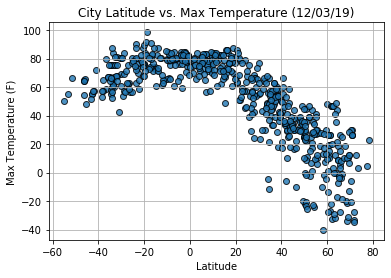

In [19]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figures/fig1.png")

plt.show()

#### Latitude vs. Humidity Plot

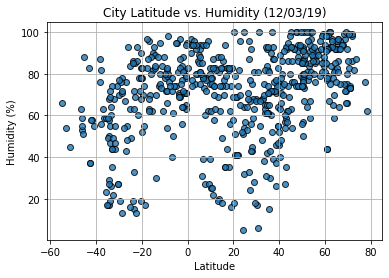

In [20]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figures/fig2.png")

plt.show()

#### Latitude vs. Cloudiness Plot

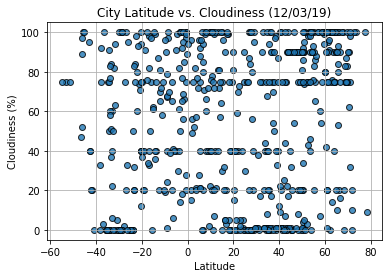

In [21]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figures/fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

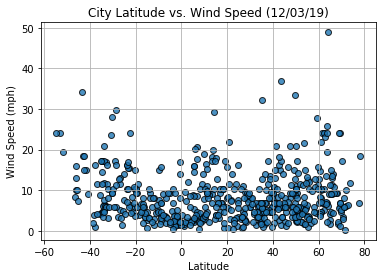

In [22]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figures/fig4.png")

plt.show()